# __MRI DETECTION__

## __EDA__

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.impute import KNNImputer

def read_and_drop(csv,features=[],dropp=False):
    df = pd.read_csv(csv)
    imputer = KNNImputer(n_neighbors=5)
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    if dropp: 
        df = df.drop(features, axis='columns')
    return df

In [21]:
X = read_and_drop('X_train.csv','id',True)
y = read_and_drop('y_train.csv','id',True)

In [15]:
X.head()

x0            x1           x2             x3          x4  \
0  14168.823171  10514.380717  3316.149698   94230.695124  102.386606   
1  17757.037554  10955.039157  4101.016273   92959.527633  103.292507   
2  14226.656663  11029.642499  3202.618739  124055.600561  100.542483   
3   8766.012436   7384.202998  2147.308418  100157.719990  104.855061   
4  13801.016418  13269.493652  3408.316953   92048.527786  103.759758   

           x5            x6            x7            x8         x9  ...  \
0   92.677127  11108.748199  10866.505510  10837.622093  10.227734  ...   
1   99.855168  10013.959449  10826.607494  10076.101597  11.436970  ...   
2   92.860892  10714.240794  10492.342868  10372.810913  10.810076  ...   
3  101.929026  10050.049932  10499.521099  10525.030989  10.092109  ...   
4   95.789235   9667.353978  10750.783106  10618.800750  12.006773  ...   

           x822          x823        x824        x825        x826  \
0   9891.466349  12352.094085  846.014651  105.132144  102.112809   
1   9535.731468  16198.071494  776.084467  106.385590  103.472030   
2  10329.704431  13976.063780  737.040332  103.671234  109.458246   
3  10008.251395   6212.127347  329.044233  105.084488  104.858546   
4  10095.782015  13772.061493  861.058909  103.875792  100.369834   

          x827      x828         x829         x830          x831  
0  2090.004260  2.691845  1234.374109  1000.784475   9285.751272  
1  2474.051881  2.287976  1296.028903  1012.626705  11750.284764  
2  2656.083281  2.843706   888.353607  1048.810385   9553.922728  
3  1097.785204  2.732257   927.752967  1048.357330   9618.936420  
4  2693.053231  2.702908  1471.354073  1071.284484   9423.533063  

[5 rows x 832 columns]

In [16]:
y.head()

y
0  74.0
1  51.0
2  70.0
3  52.0
4  85.0

NaN values have to be handled, a good way might be to use: 
-   Mean
-   Mode
-   Median
-   KNN imputation

In [17]:
X.describe()

x0            x1           x2             x3           x4  \
count   1212.000000   1212.000000  1212.000000    1212.000000  1212.000000   
mean   15185.535864  10939.687224  3418.879561   99873.151320   105.032701   
std     2234.222590   1519.861717   430.180240    9373.772088     2.755162   
min     5636.623777   6764.060541  1849.453269   65828.916291   100.056578   
25%    13931.809724   9926.530547  3159.756837   94134.675837   102.811093   
50%    14925.676526  10819.674465  3374.271218   99693.177679   104.943102   
75%    16489.628769  11766.297044  3668.158481  105554.479111   107.353976   
max    28273.690135  17777.338221  5622.951648  133145.632257   110.087261   

                x5            x6            x7            x8           x9  \
count  1212.000000   1212.000000   1212.000000   1212.000000  1212.000000   
mean     99.987217  10010.400701  10503.460640  10484.921165    10.032247   
std       9.269597    949.008662    269.169123    282.721381     0.976156   
min      70.232469   6797.836298  10000.771287  10000.339782     6.759685   
25%      94.110621   9428.209799  10284.636811  10245.766018     9.374595   
50%      99.887272  10049.603176  10520.737759  10469.756420    10.078840   
75%     105.428295  10550.835729  10700.871543  10719.386727    10.720836   
max     130.142499  13865.848591  11000.062311  10999.403374    13.828922   

       ...          x822          x823         x824         x825         x826  \
count  ...   1212.000000   1212.000000  1212.000000  1212.000000  1212.000000   
mean   ...  10052.471165  13259.107995   816.714211   104.916252   105.156990   
std    ...    932.903595   2090.831559   174.525805     2.705585     2.716728   
min    ...   7109.997185   4100.700865   164.997735   100.040624   100.015930   
25%    ...   9462.140789  12076.791406   701.037484   102.841616   102.902380   
50%    ...  10009.268843  13098.424059   808.064992   104.768625   105.350679   
75%    ...  10650.906341  14443.303301   917.070199   107.026496   107.248031   
max    ...  13173.145338  24901.251674  1589.225040   110.072565   110.069056   

              x827         x828         x829         x830          x831  
count  1212.000000  1212.000000  1212.000000  1212.000000   1212.000000  
mean   2487.985174     2.713377  1361.381100  1051.650068   9948.466286  
std     502.033789     0.257177   256.734878    28.385794    985.594596  
min     750.038434     1.590647   663.173673  1000.067137   6383.771227  
25%    2181.823042     2.534423  1193.950910  1030.447895   9318.992896  
50%    2480.373100     2.690807  1363.497083  1050.736858   9893.783836  
75%    2749.104108     2.868703  1523.007737  1076.167608  10589.347836  
max    4904.988601     3.795277  2506.104650  1099.975679  13265.026039  

[8 rows x 832 columns]

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 832 entries, x0 to x831
dtypes: float64(832)
memory usage: 7.7 MB


In [19]:
X.isnull().sum()
y.isnull().sum()
print(X)
print(y)

                x0            x1           x2             x3          x4  \
0     14168.823171  10514.380717  3316.149698   94230.695124  102.386606   
1     17757.037554  10955.039157  4101.016273   92959.527633  103.292507   
2     14226.656663  11029.642499  3202.618739  124055.600561  100.542483   
3      8766.012436   7384.202998  2147.308418  100157.719990  104.855061   
4     13801.016418  13269.493652  3408.316953   92048.527786  103.759758   
...            ...           ...          ...            ...         ...   
1207  18707.457475  13610.725702  3785.886941  113497.632841  109.526764   
1208  17108.239122  12168.536128  3442.619145   98218.773311  100.468476   
1209  14264.707321   9273.405761  3580.894003  101668.927699  102.620705   
1210  14907.077440  10936.636575  3159.167789  100400.608972  106.622507   
1211  14975.969273  11451.350347  3107.470343  100080.295868  108.040548   

              x5            x6            x7            x8         x9  ...  \
0      92

In [20]:
X.nunique()

x0      1194
x1      1200
x2      1196
x3      1197
x4      1204
        ... 
x827    1196
x828    1192
x829    1212
x830    1204
x831    1209
Length: 832, dtype: int64

## __INITIAL TRIALS (old, first simpler not to take into account)__

In [3]:
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

def tabular_importances(importances):
    # NOTE: simply prints in a nice way the feature importances

    feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
    })

    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    feature_importances.reset_index(drop=True, inplace=True)
    return feature_importances

def select_from_model_thresholded(model,X,y,th=0.35):
    # NOTE: does feature selection based on different threshold choice
    model = model.fit(X, y.values.ravel())
    imps = tabular_importances(model.feature_importances_ )
    # print(tabulate(imps, headers='keys', tablefmt='pretty'))

    default_model = SelectFromModel(model, prefit=True)
    lower_threshold_model = SelectFromModel(model,prefit=True,threshold=th)
    half_threshold_model = SelectFromModel(model, prefit=True,threshold=0.5)

    return [default_model,lower_threshold_model,half_threshold_model]

def create_array_per_model(models,X):
    # NOTE: simply get all the supports from each model, find the one that is the longest, create the array of that length, merge the masks
    # NOTE: logically it is simply a union of them so we can use the or operator
    masks = [model.get_support() for model in models]
    # NOTE: masks have all the same size and we are 100% sure about this
    union_mask = np.zeros(len(masks[0]), dtype=bool)
    for mask in masks: 
        union_mask |= mask
    
    # NOTE: now that we merged the whole selected features from the support, the non-selected features will be False so we just have to drop them
    latest_df = X.loc[:, union_mask]

    return latest_df
        

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor

X = read_and_drop('X_train.csv','id', True)
y = read_and_drop('y_train.csv','id', True)

# NOTE: having a dictionary is much more cleaner
model_batch = {
    'ex' : ExtraTreesRegressor(random_state=42),
    'rf' : RandomForestRegressor(random_state=42),
    'ab' : AdaBoostRegressor(random_state=42)
}

# NOTE: the models array has as values other array of the subsequent form :
# [ex_df_model, ex_low_model, ex_half_model]
# [rf_df_model, rf_low_model, rf_half_model]
# [ab_df_model, ab_low_model, ab_half_model]
models = [select_from_model_thresholded(md,X,y,th=0.35) for key,md in model_batch.items()] 
# NOTE: for each model in the model batch we create the union between the three threesholded 
#       models from the selected features of each that is resembled in the subsequent array
#       We end up with a X_final for any model in model_batch
# NOTE: we end up with [df,df,...,df] array of feature selected dataframes
X_fin_ens_arr = [create_array_per_model(model_thresholded,X) for model_thresholded in models] 
for df in X_fin_ens_arr:
    print(df.head())

### __OUTLIER DETECTION__

The model assigns an ‘anomaly score’ to each data point based on the depth of the tree needed to reach that point. This score aggregates the depths obtained from each of the iTrees. An anomaly score of -1 assigns anomalies and 1 to normal points based on the contamination parameter (percentage of anomalies present in the data)

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# NOTE: Auxilliary to use after analysis for last dataset
# NOTE: X_work is meant to be the X we use to work with, a feature selected dataframe
def outlier_cleaning(X_work,y,c):
     # NOTE: scaling for better numerical stability, avoiding magnitude to incide while it shouldn't
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_work)

    # NOTE: contamination is the percentage of total samples that it will find as outliers
    #       i.e X here is 1212 and the 3% is 36.6 so it will find 37 outliers
    isof = IsolationForest(n_estimators=100,contamination=c, random_state=42)
    isof = isof.fit(X_scaled)
    print(isof.get_params())
    outlier_X = isof.predict(X_scaled) 
    
    X_work.loc[:,'outlier'] = (outlier_X).astype(int)
    y.loc[:,'outlier'] = (outlier_X).astype(int)
    counts = X_work['outlier'].value_counts()

    # NOTE: PCA for plotting, 2 components
    pca = PCA(n_components=2, random_state=42)
    X_pca_2d = pca.fit_transform(X_scaled)

    # NOTE: Convert to 0 = inlier False, 1 = outlier True for clarity
    outlier_col = (outlier_X == -1).astype(int)

    # NOTE: return new X and y which have the new column marking 1 if sample is to be kept or -1 otherwise
    # NOTE: return X_pca_2d,outlier_col for plotting
    # NOTE: return counts for counting how many samples have -1 or 1 
    return X_work,y, X_pca_2d,outlier_col, counts

{'bootstrap': False, 'contamination': 0.04, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/606777695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work.loc[:,'outlier'] = (outlier_X).astype(int)


{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.5, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/1570913107.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


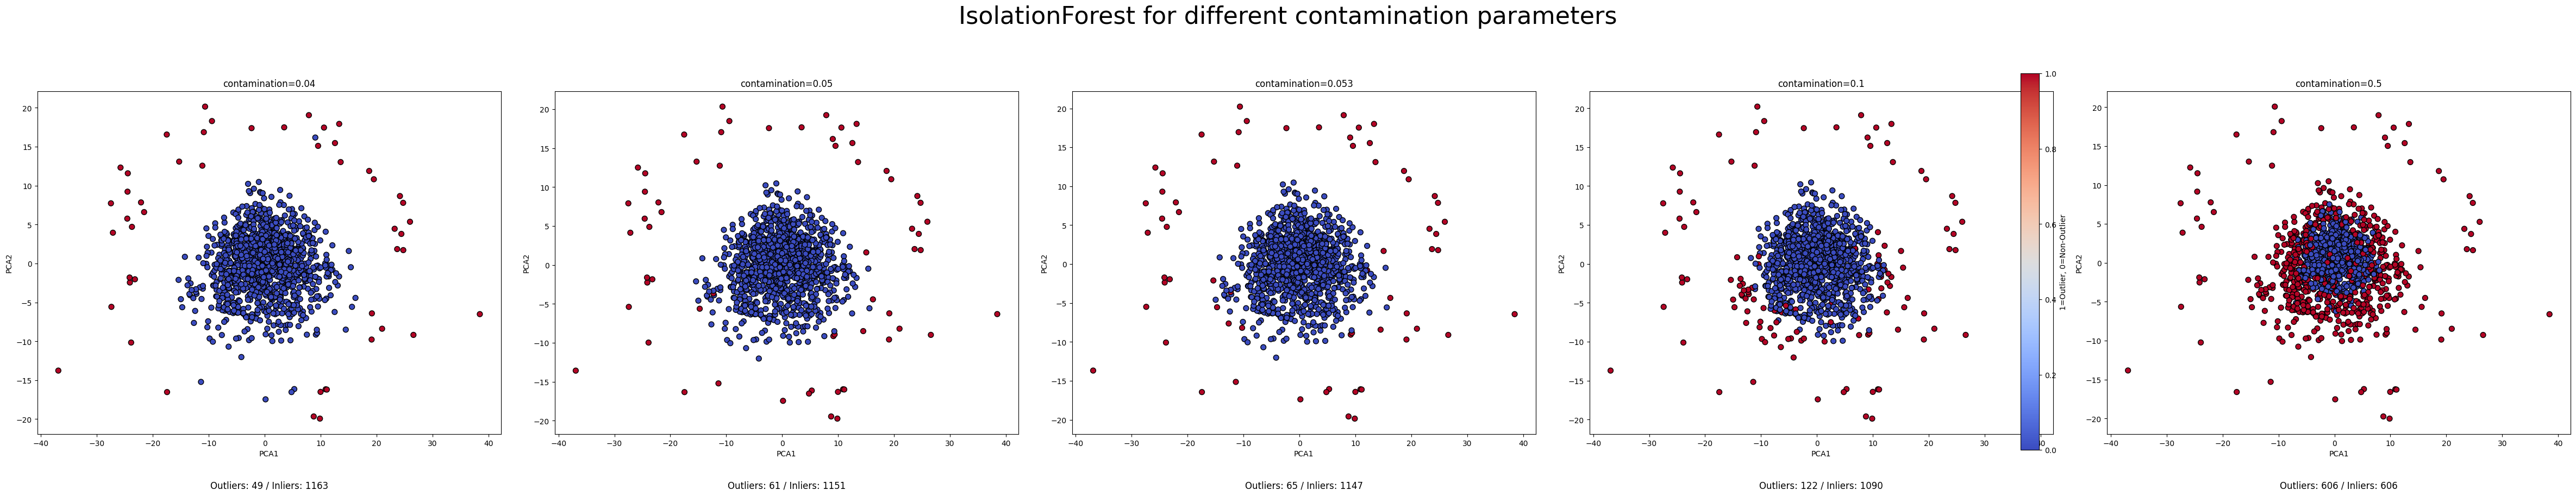

{'bootstrap': False, 'contamination': 0.04, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/606777695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work.loc[:,'outlier'] = (outlier_X).astype(int)


{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.5, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/1570913107.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


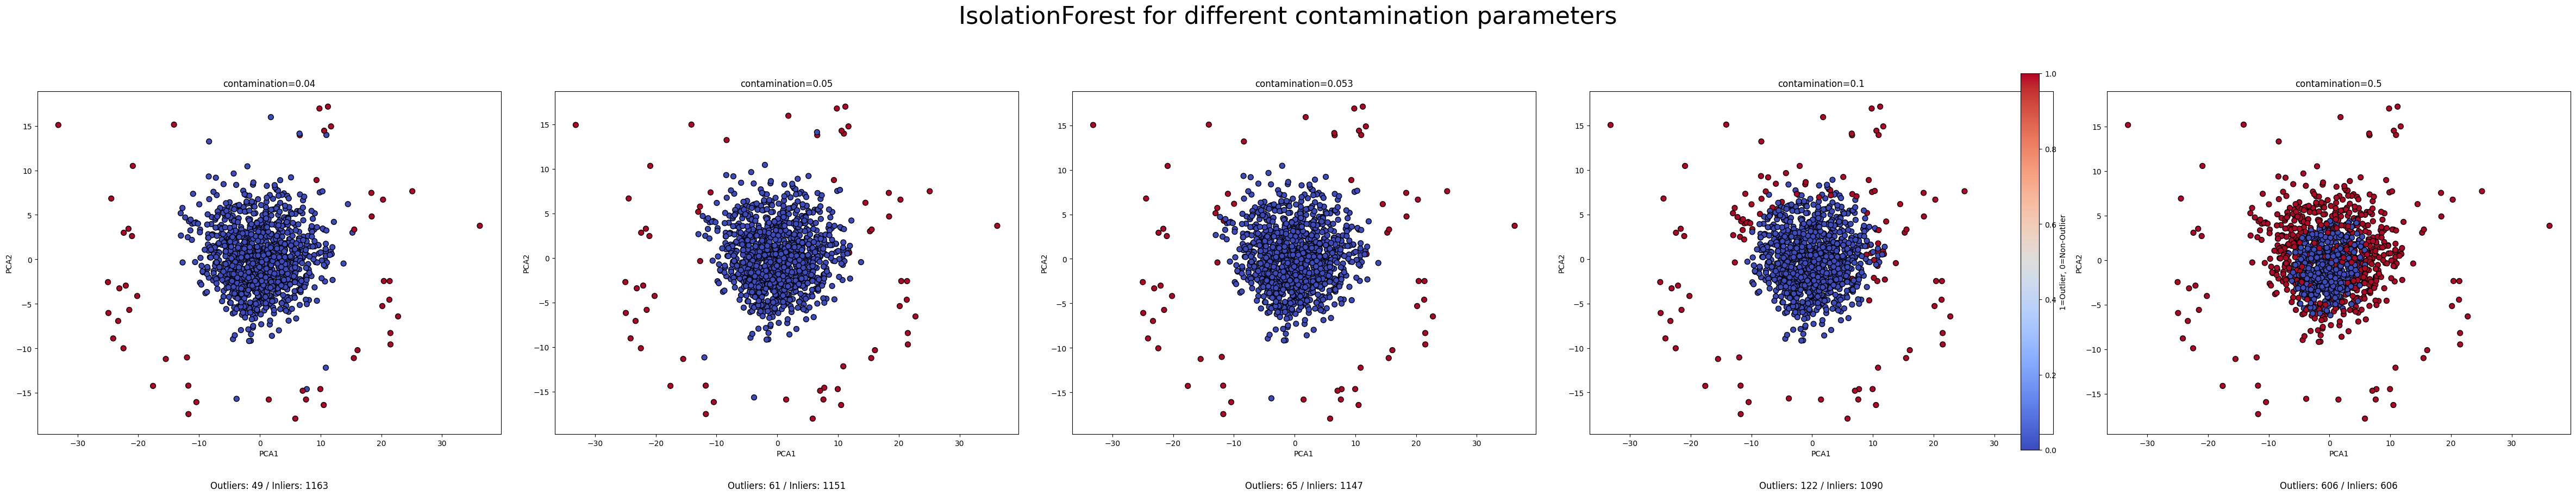

{'bootstrap': False, 'contamination': 0.04, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/606777695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work.loc[:,'outlier'] = (outlier_X).astype(int)


{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.5, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/1570913107.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


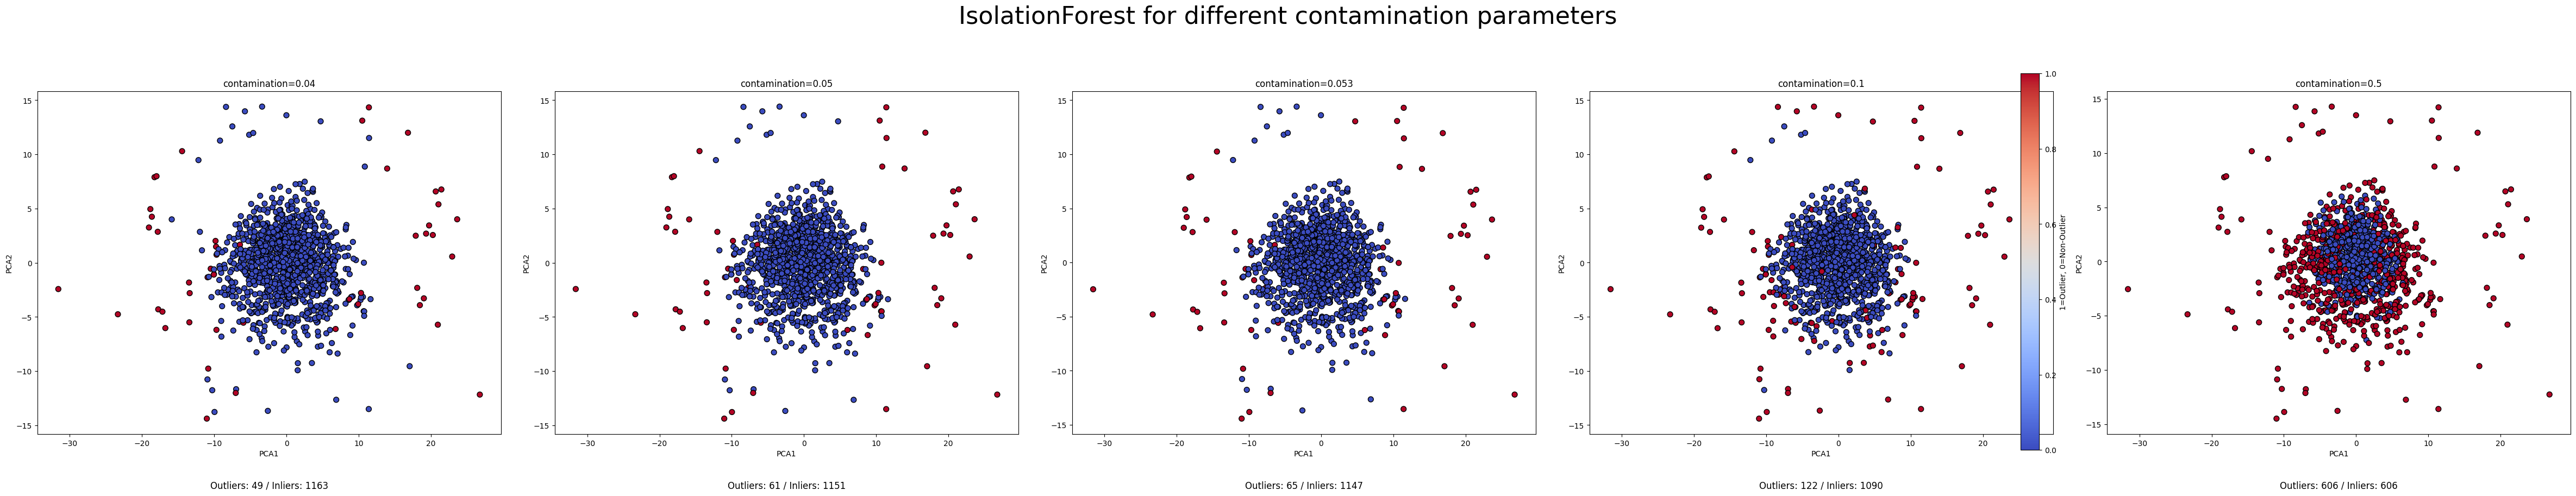

In [6]:

def plots_for_outliers(X_work):
    y = read_and_drop('y_train.csv','id', True)

    cnt = [0.04, 0.05, 0.053, 0.1, 0.5]

    fig, axes = plt.subplots(1, len(cnt), figsize=(9.5*len(cnt), 9)) 

    for i,c in enumerate(cnt):
        _,_, X_pca_2d,outlier_col,counts = outlier_cleaning(X_work,y,c)

        ax = axes[i]  
        scatter = ax.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=outlier_col, cmap='coolwarm', edgecolor='k', s=50)
        ax.set_title(f'contamination={c}')
        ax.set_xlabel('PCA1')
        ax.set_ylabel('PCA2')

        # NOTE: valuye counts returns (unique value, count)
        ax.text(
            0.5, -0.15,  # x, y in axes fraction coordinates
            f"Outliers: {counts.get(-1,0)} / Inliers: {counts.get(1,0)}",
            ha='center', va='center', transform=ax.transAxes, fontsize=12
        )

    fig.colorbar(scatter, ax=axes, orientation='vertical', label='1=Outlier, 0=Non-Outlier')
    fig.suptitle('IsolationForest for different contamination parameters', fontsize=32, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

for x_work in X_fin_ens_arr:
    plots_for_outliers(x_work)

Clearly we can see that the contamination parameter 0.053 is able to neglect all the major outliers, it is removing a a very very small quantity of points close to the inliners buit in order to fully remove the outliers, itr is better to behave like this compared to leave 1 or 2 major outliers and keep 2 or 3 out of 1000+ inliners/

In [ ]:
# NOTE: retrieve outliers, remove them from dataset, prepare dataset for use
# NOTE: param: reduced_data is expecting an pd.dataframe with featured selected columns
def official_datasets(selected_dataframe):
    # X = read_and_drop('X_train.csv','id', True)
    y = read_and_drop('y_train.csv','id', True)
    X_new,y_new,_,_,_ = outlier_cleaning(selected_dataframe,y,0.053)
    X_new = X_new[X_new['outlier'] != -1]
    y_new = y_new[y_new['outlier'] != -1]
    X_official = X_new.drop('outlier', axis='columns')
    y_official = y_new.drop('outlier', axis='columns')
    print(X_official.info())
    print(y_official.info())
    X_official.head()

    return X_official,y_official

### __SIMPLE ENSEMBLE REGRESSORS__

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def train_an_ensemble(model,param_grid,final_dfs):
    for X in final_dfs:
        X_official,y_official = official_datasets(X)

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        pca = PCA(n_components=0.95, random_state=42)
        X_pca = pca.fit_transform(X_scaled)

        explained_variance = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
        plt.axhline(y=0.9, color='r', linestyle='--', label='95% Variance Threshold')
        plt.title('Scree Plot: Explained Variance vs. Number of Components')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid(True)
        plt.legend()
        plt.show()

        n_components = len(explained_variance)
        print(f"Number of components to retain for 95% variance: {n_components}")

        X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.2, random_state=42) 

        grid = GridSearchCV(model(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train.values.ravel())

        rf_best_params = grid.best_params_
        rf = grid.best_estimator_
        r2_train = rf.score(X_train, y_train)
        print(f"r2 score on training set :  {r2_train}")

        print(f"Best Parameters: {rf_best_params}")
        print(f"Best Estimator: {rf}")

        y_pred = rf.predict(X_test)
        r2_validation = r2_score(y_test,y_pred)

        print(f"r2 score on validation set : {r2_validation}")

{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 119 entries, x2 to x828
dtypes: float64(119)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


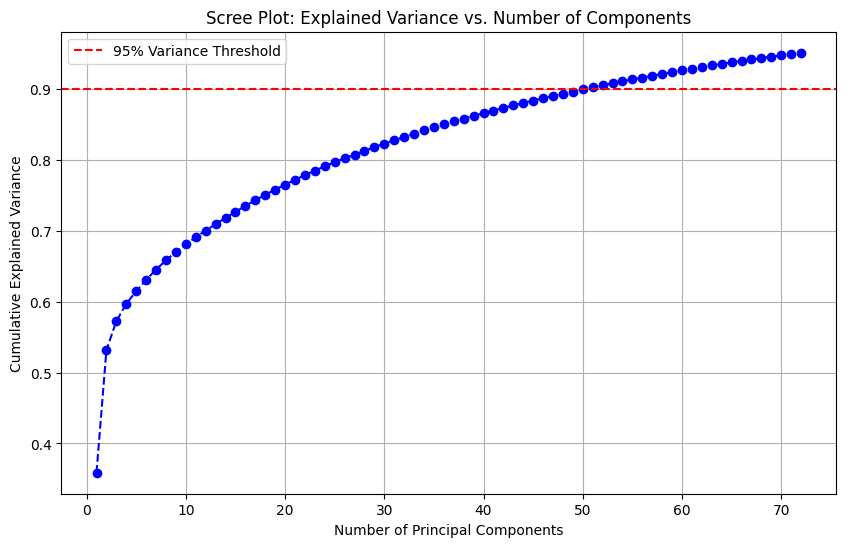

Number of components to retain for 95% variance: 72
r2 score on training set :  0.6721887796980348
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Estimator: RandomForestRegressor(ccp_alpha=0.001, max_depth=10, max_features=0.3,
                      min_samples_leaf=10, min_samples_split=5,
                      n_estimators=200, random_state=42)
r2 score on validation set : 0.4068918034835446
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 101 entries, x0 to x828
dtypes: float64(101)
memory usage: 914.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -

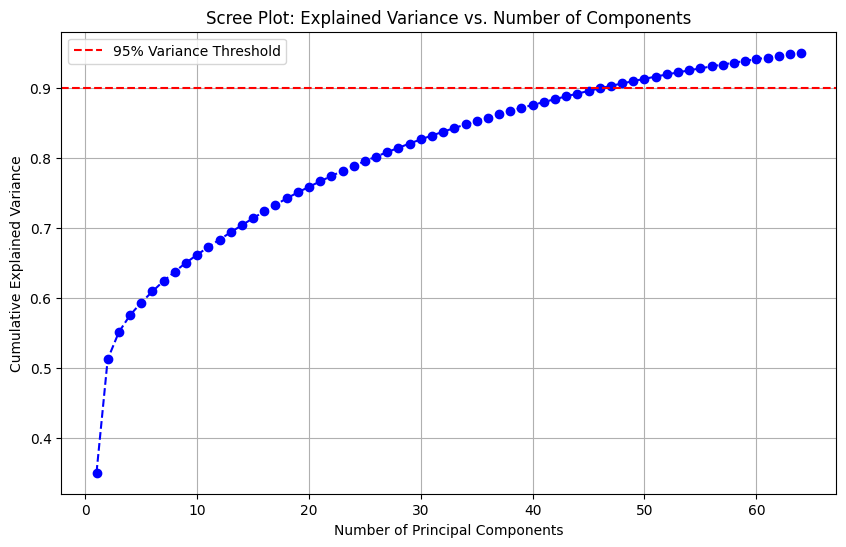

Number of components to retain for 95% variance: 64
r2 score on training set :  0.6774315288177962
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestRegressor(ccp_alpha=0.001, max_depth=10, max_features=0.3,
                      min_samples_leaf=10, min_samples_split=5,
                      random_state=42)
r2 score on validation set : 0.4269789831550762
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 149 entries, x1 to x831
dtypes: float64(149)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       

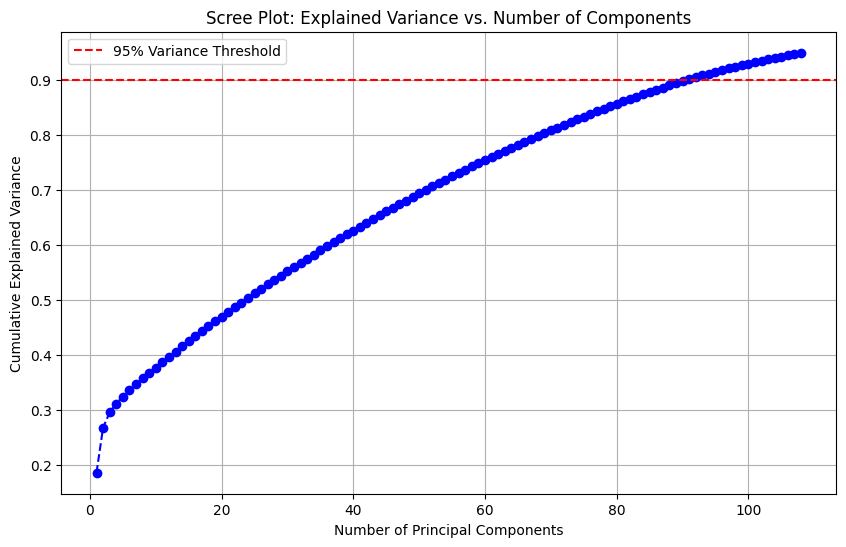

Number of components to retain for 95% variance: 108


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


r2 score on training set :  0.684177547871115
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 500}
Best Estimator: RandomForestRegressor(ccp_alpha=0.001, max_depth=20, max_features=0.3,
                      min_samples_leaf=10, min_samples_split=5,
                      n_estimators=500, random_state=42)
r2 score on validation set : 0.3917885622518509


In [20]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.3],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [10,15,20],
    'ccp_alpha': [0.001, 0.005]
}

train_an_ensemble(RandomForestRegressor,param_grid, X_fin_ens_arr)

{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 119 entries, x2 to x828
dtypes: float64(119)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


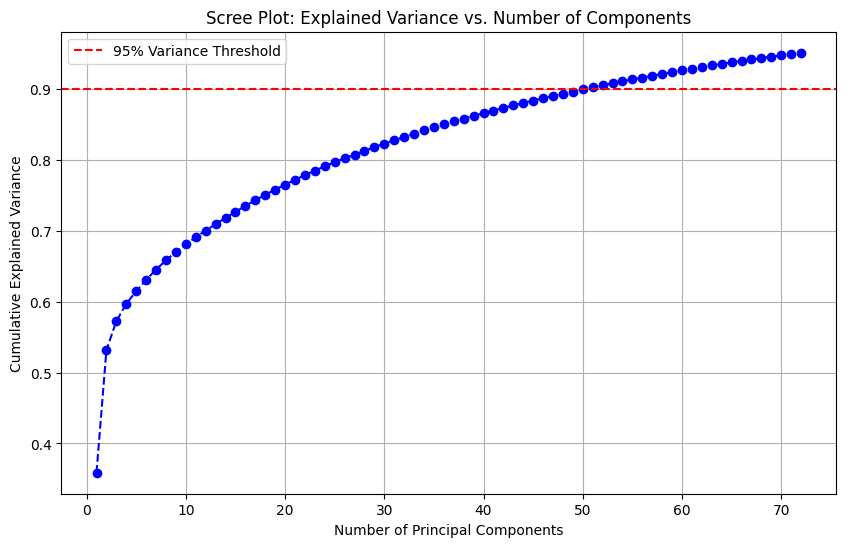

Number of components to retain for 95% variance: 72


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


r2 score on training set :  0.42122237120732553
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.005, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Estimator: ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.005, max_depth=20,
                    max_features=0.3, min_samples_leaf=10, min_samples_split=5,
                    n_estimators=200, random_state=42)
r2 score on validation set : 0.2696788116187928
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 101 entries, x0 to x828
dtypes: float64(101)
memory usage: 914.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       11

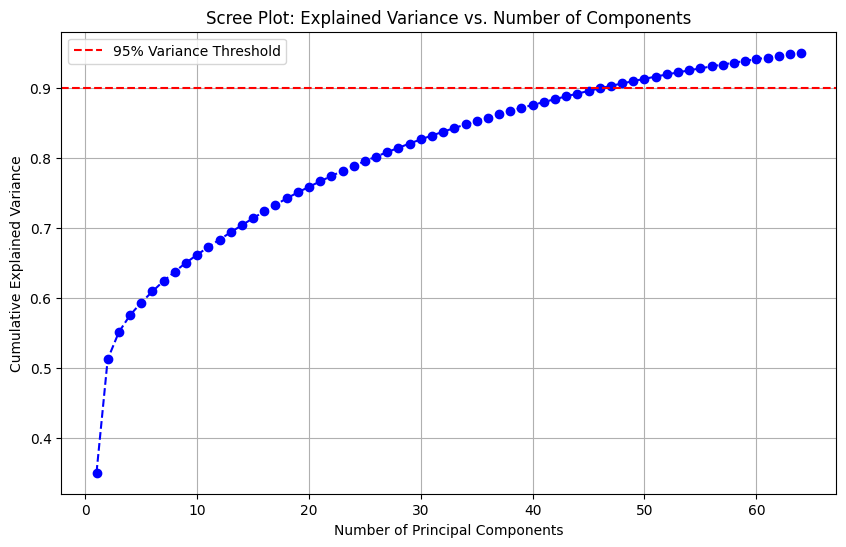

Number of components to retain for 95% variance: 64
r2 score on training set :  0.4135900553164916
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.001, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 500}
Best Estimator: ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.001, max_depth=20,
                    max_features=0.3, min_samples_leaf=10, min_samples_split=5,
                    n_estimators=500, random_state=42)
r2 score on validation set : 0.26185616298849523
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 149 entries, x1 to x831
dtypes: float64(149)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
--

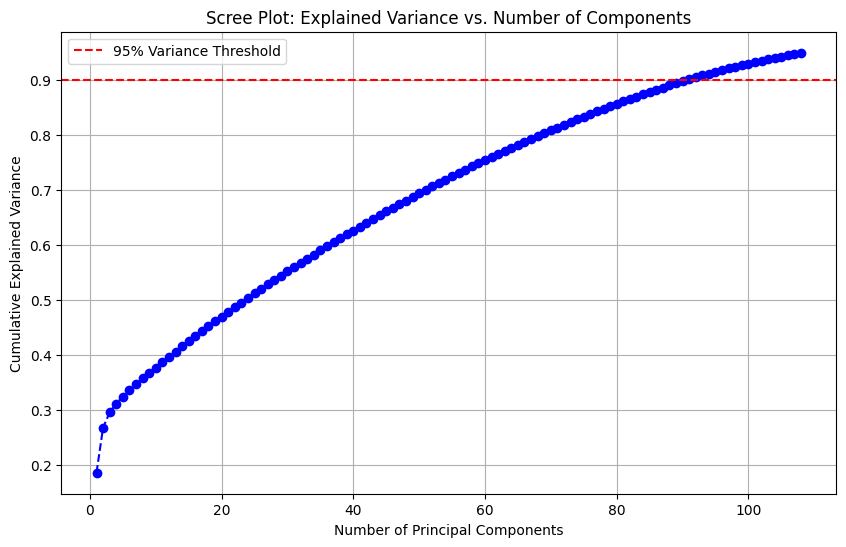

Number of components to retain for 95% variance: 108


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


r2 score on training set :  0.4318282775581659
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.005, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 500}
Best Estimator: ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.005, max_depth=20,
                    max_features=0.3, min_samples_leaf=10, min_samples_split=5,
                    n_estimators=500, random_state=42)
r2 score on validation set : 0.23592084885305298


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.3],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [10,15,20],
    'ccp_alpha': [0.001, 0.005]
}

train_an_ensemble(ExtraTreesRegressor,param_grid, X_fin_ens_arr)

{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 119 entries, x2 to x828
dtypes: float64(119)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


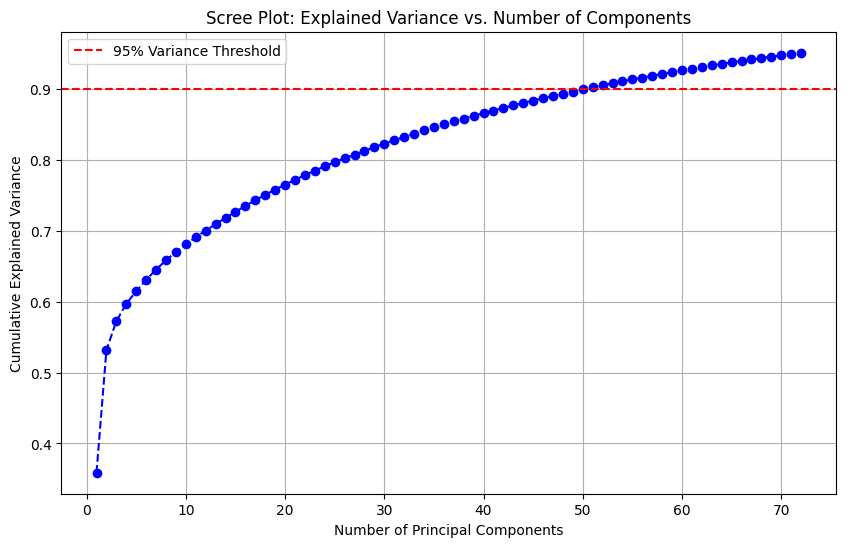

Number of components to retain for 95% variance: 72
r2 score on training set :  0.7353214353056214
Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=4), 'learning_rate': 0.5, 'n_estimators': 200}
Best Estimator: AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.5, n_estimators=200, random_state=42)
r2 score on validation set : 0.4748411187561137
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 101 entries, x0 to x828
dtypes: float64(101)
memory usage: 914.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


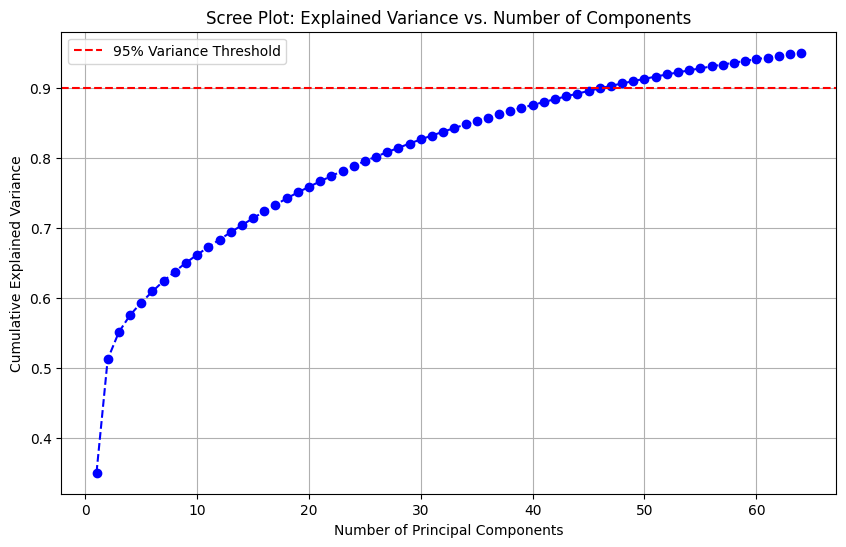

Number of components to retain for 95% variance: 64
r2 score on training set :  0.7197538418418892
Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=4), 'learning_rate': 0.5, 'n_estimators': 200}
Best Estimator: AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.5, n_estimators=200, random_state=42)
r2 score on validation set : 0.4247736807158795
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 149 entries, x1 to x831
dtypes: float64(149)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


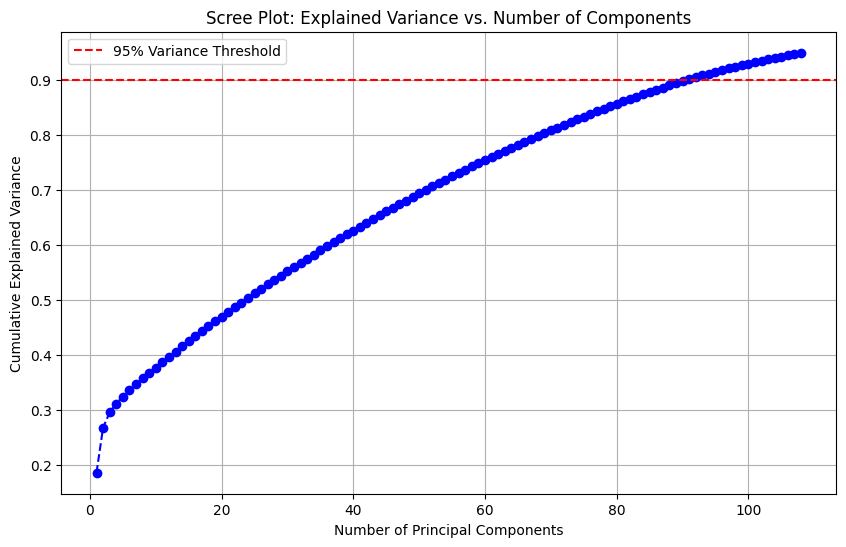

Number of components to retain for 95% variance: 108
r2 score on training set :  0.7437031400390831
Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=4), 'learning_rate': 0.5, 'n_estimators': 200}
Best Estimator: AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.5, n_estimators=200, random_state=42)
r2 score on validation set : 0.4671932518054501


In [19]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator': [
        DecisionTreeRegressor(max_depth=2),
        DecisionTreeRegressor(max_depth=4),
        LinearRegression()
    ]
}

train_an_ensemble(AdaBoostRegressor, param_grid, X_fin_ens_arr)

# __REAL ANALYSIS__

## __OUTLIER DETECTION__

first step is imputing data
Univariate filter feature selection
lasso feature selection
PCA reduction
y targeted denoising
stacking ridge and gradient boosting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def clean_with_gmm_pca2d(X_full, y_full, outlier_percentile=4.5):
 
    X_imp = KNNImputer(n_neighbors=7).fit_transform(X_full)
    X_scaled = RobustScaler().fit_transform(X_imp)

    pca_2d = PCA(n_components=2, random_state=42)
    X_2d = pca_2d.fit_transform(X_scaled)

    gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
    gmm.fit(X_2d)
    log_likelihood = gmm.score_samples(X_2d)

    threshold = np.percentile(log_likelihood, outlier_percentile)
    mask = log_likelihood >= threshold
    n_outliers = (~mask).sum()
    print(f"Removed {n_outliers} outliers out of {len(X_full)} samples ({100*n_outliers/len(X_full):.2f}%)")

    X_clean = X_full[mask]
    y_clean = y_full[mask]

    plt.figure(figsize=(6,6))
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label='Inliers', alpha=0.6)
    plt.scatter(X_2d[~mask, 0], X_2d[~mask, 1], label='Outliers', color='red', alpha=0.8)

    def plot_gmm_ellipse(gmm, ax, n_std=2.0, facecolor='none', **kwargs):
        for mean, cov in zip(gmm.means_, gmm.covariances_):
            v, w = np.linalg.eigh(cov)
            order = v.argsort()[::-1]
            v, w = v[order], w[:, order]
            angle = np.degrees(np.arctan2(*w[:,0][::-1]))
            width, height = 2 * n_std * np.sqrt(v)
            ellip = Ellipse(xy=mean, width=width, height=height, angle=angle,
                            facecolor=facecolor, **kwargs)
            ax.add_patch(ellip)

    ax = plt.gca()
    plot_gmm_ellipse(gmm, ax, n_std=1, edgecolor='green', linestyle='--', label='1σ')
    plot_gmm_ellipse(gmm, ax, n_std=2, edgecolor='blue', linestyle='--', label='2σ')
    plot_gmm_ellipse(gmm, ax, n_std=3, edgecolor='purple', linestyle='--', label='3σ')

    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('GMM Outlier Detection on PCA 2D')
    plt.legend()
    plt.grid(True)
    plt.show()

    return X_clean, y_clean, mask


Removed 55 outliers out of 1212 samples (4.54%)


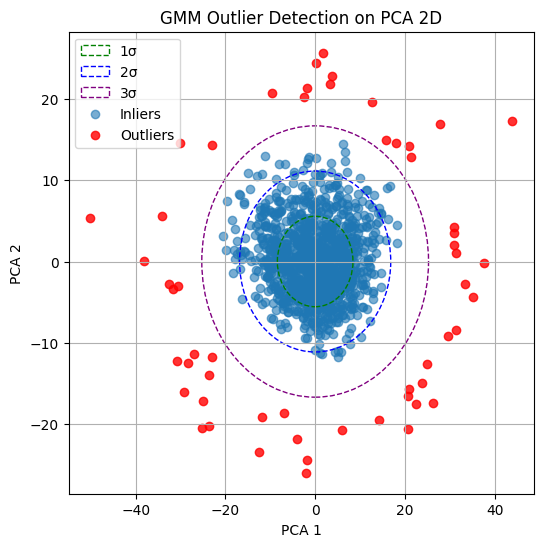

Cleaned dataset shape: (1157, 832)


In [3]:
X_full = pd.read_csv("X_train.csv").drop('id', axis=1).to_numpy()
y_full = pd.read_csv("y_train.csv").drop('id', axis=1).squeeze().to_numpy()

X_clean, y_clean, mask = clean_with_gmm_pca2d(X_full, y_full, outlier_percentile=4.5)

print(f"Cleaned dataset shape: {X_clean.shape}")

### __*FEATURE SELECTION*__

In [42]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression,r_regression, SelectPercentile
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA

def scaled_and_selected_data(X_full,y_full): 
    imputer_knn = KNNImputer(n_neighbors=7)
    scaler_final = RobustScaler() 
    X_imp = scaler_final.fit_transform(imputer_knn.fit_transform(X_full))
    print(f"[Stage 1] After imputation & scaling: {X_imp.shape[1]} features")

    # NOTE: easily imputes where values are missing with median of column and scales then features 
    # NOTE: preliminary feature selection, choose features based on their correlation with the y, 
    # NOTE: makes lasso and PCA even better and faster. 
    # At least 200
    num_corr_features = 200
    selector_corr = SelectKBest(f_regression, k=num_corr_features) 
    X_corr = selector_corr.fit_transform(X_imp, y_full) 
    print(f"[Stage 2] After correlation filtering F_regression (SelectKBest): {X_corr.shape[1]} features")


    # NOTE: After the preliminary feature selection, lasso is further use to selected even a better # subset of features. 
    # at least 250
    lasso = LassoCV(cv=5, max_iter=5000, random_state=42) 
    lasso.fit(X_corr, y_full) 
    mask = np.abs(lasso.coef_) > 1e-5 
    if mask.sum() < 50: 
        top_idx = np.argsort(-np.abs(lasso.coef_))[:50] 
        mask = np.zeros_like(lasso.coef_, dtype=bool) 
        mask[top_idx] = True 
    X_lasso = X_corr[:, mask] 
    print(f"[Stage 3] After LASSO selection: {X_lasso.shape[1]} features")


    # NOTE: Further reduce feature space by creating principal components that are able to explain most of the variance 
    # Makes features uncorrelated and lower dimensional 
    # pca_components = min(25, X_lasso.shape[1]) 
    pca = PCA(random_state=42) 
    X_pca = pca.fit_transform(X_lasso) 
    print(f"[Stage 4] After PCA (100% variance retained): {X_pca.shape[1]} components")

    print(f"Feature selection pipeline completed: {X_full.shape[1]} → {X_pca.shape[1]} features retained.\n")

    return X_pca, imputer_knn,scaler_final,selector_corr,pca,X_lasso,mask

## __*STACKING (Linear models + boosting)*__

In [87]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

def train_ridge(X_train,y_train):
    ridge_grid = {'alphas':[np.logspace(-4,4,9)]}
    ridge = GridSearchCV(RidgeCV(), ridge_grid, cv=5, n_jobs=-1)
    ridge.fit(X_train, y_train)
    print(ridge.best_estimator_)
    
    return ridge

X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)
ridge = train_ridge(X_train, y_train)

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering (SelectKBest): 200 features
[Stage 3] After LASSO selection: 69 features
[Stage 4] After PCA (95% variance retained): 69 components

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]))


In [88]:
from sklearn.linear_model import ElasticNetCV
import numpy as np

def train_elasticnet(X_train, y_train):
    """
    Trains an ElasticNet with cross-validated alpha and L1 ratio.
    """
    enet = ElasticNetCV(
        l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],  # mix of L1/L2
        alphas=np.logspace(-3, 2, 10),
        cv=5,
        n_jobs=-1,
        random_state=42,
        max_iter=5000
    )
    enet.fit(X_train, y_train)
    print("Best ElasticNet: alpha =", enet.alpha_, "l1_ratio =", enet.l1_ratio_)
    return enet

X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)
enet = train_elasticnet(X_train,y_train)

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering (SelectKBest): 200 features
[Stage 3] After LASSO selection: 69 features
[Stage 4] After PCA (95% variance retained): 69 components

Best ElasticNet: alpha = 0.1668100537200059 l1_ratio = 0.1


In [89]:
from sklearn.linear_model import LassoCV
import numpy as np

def train_lasso(X_train, y_train):
    """
    Trains a Lasso (L1) regression with cross-validated alpha.
    """
    lasso = LassoCV(
        alphas=np.logspace(-3, 1, 10),
        cv=5,
        n_jobs=-1,
        random_state=42,
        max_iter=5000
    )
    lasso.fit(X_train, y_train)
    print("Best Lasso: alpha =", lasso.alpha_)
    return lasso

X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)
lasso = train_lasso(X_train,y_train)

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering (SelectKBest): 200 features
[Stage 3] After LASSO selection: 69 features
[Stage 4] After PCA (95% variance retained): 69 components

Best Lasso: alpha = 0.05994842503189409


In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

def train_gb_fullgrid(X_train, y_train):
    
    gb_base = GradientBoostingRegressor(
        random_state=42,
        loss='squared_error',
        verbose=0
    )

    gb_grid = {
        'n_estimators': [200, 400],
        'learning_rate': [0.03, 0.05, 0.1],
        'max_depth': [3, 4, 6, 8],
        'min_samples_leaf': [10, 20, 30],
        'subsample': [0.7, 1.0],
        'max_features': ['sqrt', 'log2', None]
    }

    gb_search = GridSearchCV(
        gb_base,
        gb_grid,
        cv=3,
        n_jobs=-1,
        verbose=1,
        scoring='r2'
    )

    gb_search.fit(X_train, y_train)
    print("Best Estimator:", gb_search.best_estimator_)

    return gb_search

X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)

gb = train_gb_fullgrid(X_train, y_train)

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering (SelectKBest): 200 features
[Stage 3] After LASSO selection: 69 features
[Stage 4] After PCA (95% variance retained): 69 components

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Estimator: GradientBoostingRegressor(learning_rate=0.03, max_depth=8, min_samples_leaf=30,
                          n_estimators=400, random_state=42, subsample=0.7)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def train_rf(X_train,y_train):
    rf_grid = {
        'n_estimators': [300, 600, 1000],       
        'max_depth': [6, 8, 10, 12, None],          
        'min_samples_split': [2, 5, 10, 20],        
        'min_samples_leaf': [1, 3, 5, 10, 15],      
        'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
    }
    rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_grid, cv=3, n_jobs=-1,verbose=1, scoring='r2')
    rf.fit(X_train, y_train)
    print(rf.best_estimator_)
    
    return rf

X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)
rf = train_rf(X_train, y_train)

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering (SelectKBest): 200 features
[Stage 3] After LASSO selection: 69 features
[Stage 4] After PCA (95% variance retained): 69 components

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestRegressor(max_depth=12, max_features=0.7, min_samples_split=5,
                      n_estimators=300, random_state=42)


In [91]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def train_ab(X_train,y_train):
    ab_grid = {
        'n_estimators': [200, 500, 800, 1200],
        'learning_rate': [0.01, 0.05, 0.1, 0.3],
        'estimator__max_depth': [2, 3, 4],
        'estimator__min_samples_leaf': [1, 3, 5]
    }
    ab = GridSearchCV(
        AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42),
        ab_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    ab.fit(X_train, y_train)
    print(ab.best_estimator_)

    return ab


X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)
ab = train_ab(X_train,y_train)

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering (SelectKBest): 200 features
[Stage 3] After LASSO selection: 69 features
[Stage 4] After PCA (95% variance retained): 69 components

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4,
                                                  min_samples_leaf=3,
                                                  random_state=42),
                  learning_rate=0.3, n_estimators=1200, random_state=42)


In [96]:
import numpy as np
from sklearn.ensemble import  StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def build_pipeline(X_train, y_train, X_test, y_test, mask, ridge, enet, lasso, rf, gb, ab):

    estimators = [
        ('ridge', ridge),
        ('gb', gb),
        ('rf', rf),
        ('ada', ab),
        ('enet', enet),
        ('lasso', lasso),
    ]

    meta_model = RidgeCV(alphas=np.logspace(-3,3,7), cv=5)
    stacked = StackingRegressor(estimators=estimators,final_estimator=meta_model, cv='prefit', n_jobs=-1)
    stacked.fit(X_train, y_train)
    y_pred_stack_train = stacked.predict(X_train)
    y_pred_stack_test = stacked.predict(X_test)


    models = {
        "Ridge": ridge,
        "ElasticNet": enet,
        "Lasso": lasso,
        "RandomForest": rf,
        "gb": gb,
        "AdaBoost": ab,
        "Stacked": stacked
    }

    for name, model in models.items():
        print(f"{name:15s} | Train R²: {r2_score(y_train, model.predict(X_train)):.3f} | "
            f"Test R²: {r2_score(y_test, model.predict(X_test)):.3f}")

    def predict_fn(X_new):
        X_proc_new  = imputer_knn.transform(X_new)
        X_scaled    = scaler_final.transform(X_proc_new)
        X_corr_new  = selector_corr.transform(X_scaled)
        X_lasso_new = X_corr_new[:, mask]
        X_pca_new   = pca.transform(X_lasso_new)

        return stacked.predict(X_pca_new)

    return {
        'lasso_mask': mask,
        'predict': predict_fn,
        'X_train': X_train,
        'y_train': y_train,
        'y_train_pred': y_pred_stack_train,
        'X_test': X_test,
        'y_test': y_test,
        'y_test_pred': y_pred_stack_test
    }


X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)

pipeline = build_pipeline(X_train, y_train, X_test, y_test, mask, ridge, enet, lasso, rf, gb, ab)

print("Train R²:", r2_score(pipeline['y_train'], pipeline['y_train_pred']))
print("Test  R²:", r2_score(pipeline['y_test'], pipeline['y_test_pred']))

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering (SelectKBest): 200 features
[Stage 3] After LASSO selection: 69 features
[Stage 4] After PCA (95% variance retained): 69 components

Ridge           | Train R²: 0.643 | Test R²: 0.585
ElasticNet      | Train R²: 0.635 | Test R²: 0.586
Lasso           | Train R²: 0.644 | Test R²: 0.584
RandomForest    | Train R²: 0.913 | Test R²: 0.540
gb              | Train R²: 0.973 | Test R²: 0.623
AdaBoost        | Train R²: 0.772 | Test R²: 0.552
Stacked         | Train R²: 0.988 | Test R²: 0.604
Train R²: 0.9878164010769073
Test  R²: 0.604398224331083


## __NEURAL NETWORKS__

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering F_regression (SelectKBest): 200 features
[Stage 3] After LASSO selection: 71 features
[Stage 4] After PCA (100% variance retained): 71 components
Feature selection pipeline completed: 832 → 71 features retained.

Epoch 1/4000
2/2 [==============================] - 1s 149ms/step - loss: 5021.7476 - mae: 70.2988 - val_loss: 4839.5698 - val_mae: 68.9773 - lr: 0.0010
Epoch 2/4000
2/2 [==============================] - 0s 38ms/step - loss: 4985.0928 - mae: 70.2768 - val_loss: 4838.5728 - val_mae: 68.9984 - lr: 0.0010
Epoch 3/4000
2/2 [==============================] - 0s 41ms/step - loss: 4972.1294 - mae: 70.2544 - val_loss: 4842.2554 - val_mae: 69.0479 - lr: 0.0010
Epoch 4/4000
2/2 [==============================] - 0s 43ms/step - loss: 4962.4810 - mae: 70.2317 - val_loss: 4851.3579 - val_mae: 69.1337 - lr: 0.0010
Epoch 5/4000
2/2 [==============================] - 0s 40ms/step - loss: 4954.5571 - mae:

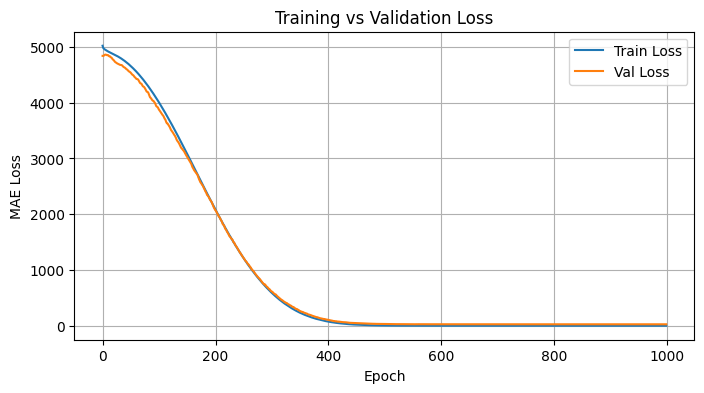

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def train_neural_network(X_train,y_train,X_test,y_test,random_state=42, verbose=1):

    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),

        layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.GaussianNoise(0.01),

        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        # layers.Dropout(0.01),

        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        # layers.Dropout(0.01),

        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        # layers.BatchNormalization(),
        layers.Dropout(0.01),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),

        layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=['mae']
    )

    es = callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
    lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=25, min_lr=1e-30)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=4000,
        batch_size=512,
        callbacks=[es, lr],
        verbose=verbose
    )

    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\nPerformance on Test Data:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(8, 4))
    plt.plot(history_df['loss'], label='Train Loss')
    plt.plot(history_df['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MAE Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.grid(True)
    plt.show()

    return model, history_df

X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.25, random_state=42)

neural,_ = train_neural_network(X_train,y_train,X_test,y_test)

### __*PREDICTING FUNCTION*__

In [44]:
def predict_neural(X_new, neural_model, imputer_knn, scaler_final, selector_corr, pca, mask):
    if hasattr(X_new, 'values'):
        X_new = X_new.values

    X_proc_new = imputer_knn.transform(X_new)
    X_scaled = scaler_final.transform(X_proc_new)
    X_corr_new = selector_corr.transform(X_scaled)
    X_lasso_new = X_corr_new[:, mask]
    X_pca_new = pca.transform(X_lasso_new)
    y_pred = neural_model.predict(X_pca_new).flatten()

    return y_pred

### __*UNSEEN DATA AND SUBMISSION*__

In [75]:
X_pca, imputer_knn, scaler_final,selector_corr,pca, X_lasso,mask = scaled_and_selected_data(X_clean,y_clean)
X_new_df = pd.read_csv("X_test.csv")  
ids = X_new_df['id'].to_numpy()
X_new = X_new_df.drop('id', axis=1).to_numpy()
y_pred_neural = predict_neural(X_new,neural, imputer_knn, scaler_final, selector_corr, pca, mask)

submission_df = pd.DataFrame({
    'id': ids,
    'y': y_pred_neural
})

submission_df.to_csv("submission15.csv", index=False)
print("Submission file saved as submissio6.csv")

[Stage 1] After imputation & scaling: 832 features
[Stage 2] After correlation filtering F_regression (SelectKBest): 200 features
[Stage 3] After LASSO selection: 71 features
[Stage 4] After PCA (100% variance retained): 71 components
Feature selection pipeline completed: 832 → 71 features retained.

25/25 [==============================] - 0s 2ms/step
Submission file saved as submissio6.csv


## __TEST MODEL ON UNSEEN DATA AND CREATE SUBMISSION FILE__

In [76]:
import csv

file1 = "submission12.csv"
file2 = "submission15.csv"

with open(file1) as f1, open(file2) as f2:
    reader1 = csv.reader(f1)
    reader2 = csv.reader(f2)
    
    header1 = next(reader1)
    header2 = next(reader2)
    
    print(f"{header1[0]:<5} {header1[1]:<20}  {'Difference':<20}")
    
    for row1, row2 in zip(reader1, reader2):
        id1, y1 = row1
        id2, y2 = row2
        y1 = float(y1)
        y2 = float(y2)
        diff = abs(y1 - y2)
        print(f"{id1:<5} {y1:<20} {diff:<20}")


id    y                     Difference          
0.0   61.29255             0.5175899999999984  
1.0   74.15181             2.5216999999999956  
2.0   72.70689             1.6080050000000057  
3.0   78.55868             0.6585999999999927  
4.0   70.05285             1.0571699999999993  
5.0   55.624622            1.1864470000000011  
6.0   63.553875            1.1230389999999986  
7.0   77.14884             3.23236             
8.0   65.38056             3.5233750000000015  
9.0   57.480503            1.0741039999999984  
10.0  73.254425            1.0996049999999968  
11.0  73.353096            2.1617280000000108  
12.0  51.52872             0.5388799999999989  
13.0  73.9753              1.2836100000000101  
14.0  73.299736            1.7808259999999905  
15.0  61.89184             1.070177000000001   
16.0  79.007805            0.16301500000000146 
17.0  69.43672             0.7855399999999975  
18.0  66.38505             0.46133999999999276 
19.0  64.7777              0.4601100000